# TASK-1:TITANIC SURVIVAL PREDICTION

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
data = pd.read_csv("Titanic-Dataset[1].csv")
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']
target = 'Survived'
X = data[features]
y = data[target]
X.loc[:, 'Age'] = X['Age'].fillna(X['Age'].median())
X.loc[:, 'Embarked'] = X['Embarked'].fillna(X['Embarked'].mode()[0])
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

print(X.head())


   Pclass   Age  SibSp  Parch  Sex_male  Embarked_Q  Embarked_S
0       3  22.0      1      0      True       False        True
1       1  38.0      1      0     False       False       False
2       3  26.0      0      0     False       False        True
3       1  35.0      1      0     False       False        True
4       3  35.0      0      0      True       False        True


In [19]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [20]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

# Plot survival counts

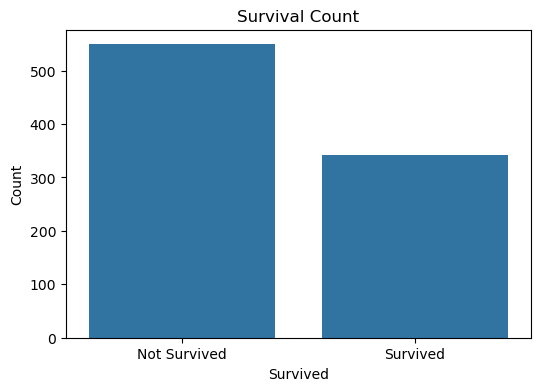

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'])
plt.show()

# Plot pie chart of survival proportions

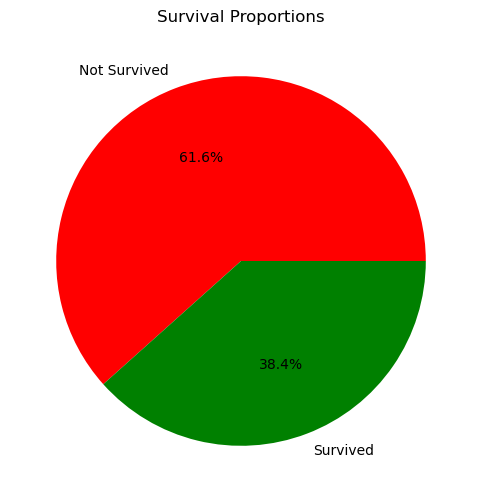

In [22]:
plt.figure(figsize=(6, 6))
survival_counts = data['Survived'].value_counts()
plt.pie(survival_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Survival Proportions')
plt.show()

# Accuracy

In [23]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81
